<a href="https://www.kaggle.com/code/blessingumoru/playground-s3e12-using-esemble-learning?scriptVersionId=124733326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
train_data= pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test_data= pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
#original_data= pd.read_csv('/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv')
inputdata = train_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
ttdata =test_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]

In [3]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4),

(None, None)

In [4]:
train_data.isna().sum(), test_data.isna().sum()

(id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 target     0
 dtype: int64,
 id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 dtype: int64)

In [5]:
train_data.duplicated().sum(),test_data.duplicated().sum()

(0, 0)

# Definition of Features

**id**-identification
>**target** - Probability it is a kidney stone 

**gravity(normal -1.002 to 1.030)**- 
>Urine gravity refers to the concentration of particles in the urine, specifically the amount of dissolved solids, such as salts and minerals.higher urine gravity values can indicate dehydration or the presence of certain medical conditions that increase the risk of developing kidney stones.

**ph (normal - 4.5 to 8.0 where 7.0 is neutral)**- 
>High urine pH levels can increase the risk of struvite or calcium phosphate stones, while low urine pH levels can increase the risk of uric acid stones.

**osmo(normal 50 to 1400 milliosmoles per kilogram (mOsm/kg).)** -
>High urine osmolality can increase the risk of certain types of kidney stones, including calcium oxalate and calcium phosphate stones.

**cond (the normal range for urine conductivity is between 50 and 1,500 microsiemens per centimeter (μS/cm))** 
>Urine conductivity is a measure of the ability of urine to conduct an electrical current, and it is influenced by the concentration of dissolved ions in the urine, including calcium, sodium, potassium, and magnesium.

**urea**
> A waste product of protein metabolism that is excreted by the kidneys.

**calc (concentration of calcium in urine -(between 100 and 300 mg/dL or 2.5 and 7.5 mmol/L.))**
> Calcium concentration refers to the amount of calcium ions (Ca2+) present in a given volume of urine or other biological fluid.

**create a new feature**
* osomlarity is directly proportional to gravity
* The higher the PH the higher the the concentration of calcium**directly propotional**
* The lower the PH the higher the urea(uric acid)**inversely propotional**
* no of particle per calcium = osomlarity/(conc of calcium *vant hoff factor)
* no of particle per urea = osomlarity/(urea *vant hoff factor)

# Feature Engineering

In [6]:
targetVar = train_data.target
inputVariable = train_data.drop(['target','id'],axis=1)

In [7]:
inputVariable.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

In [8]:
inputVariable.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

In [9]:
inputVariable.duplicated().sum()

0

# EDA

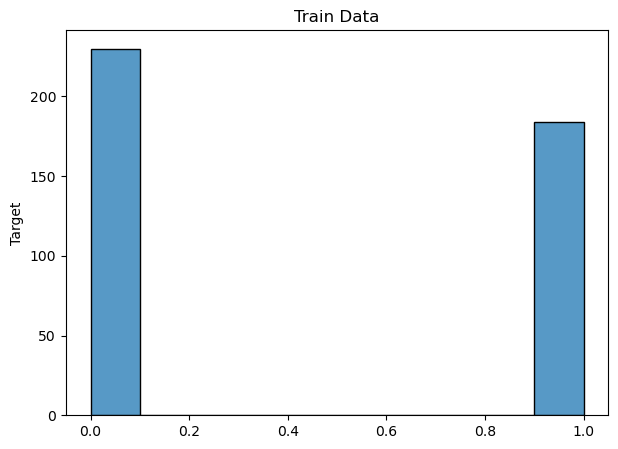

In [10]:
plt.figure(figsize=(7,5))
p = sns.histplot(data=train_data, x="target")
p.set(xlabel = None)
p.set(ylabel = 'Target')
plt.title('Train Data')
plt.show()

#plt.figure(figsize=(7,5))
#p = sns.histplot(data=original_data, x="target")
#p.set(xlabel = None)
#p.set(ylabel = 'Target')
#plt.title('Original Data')
#plt.show()

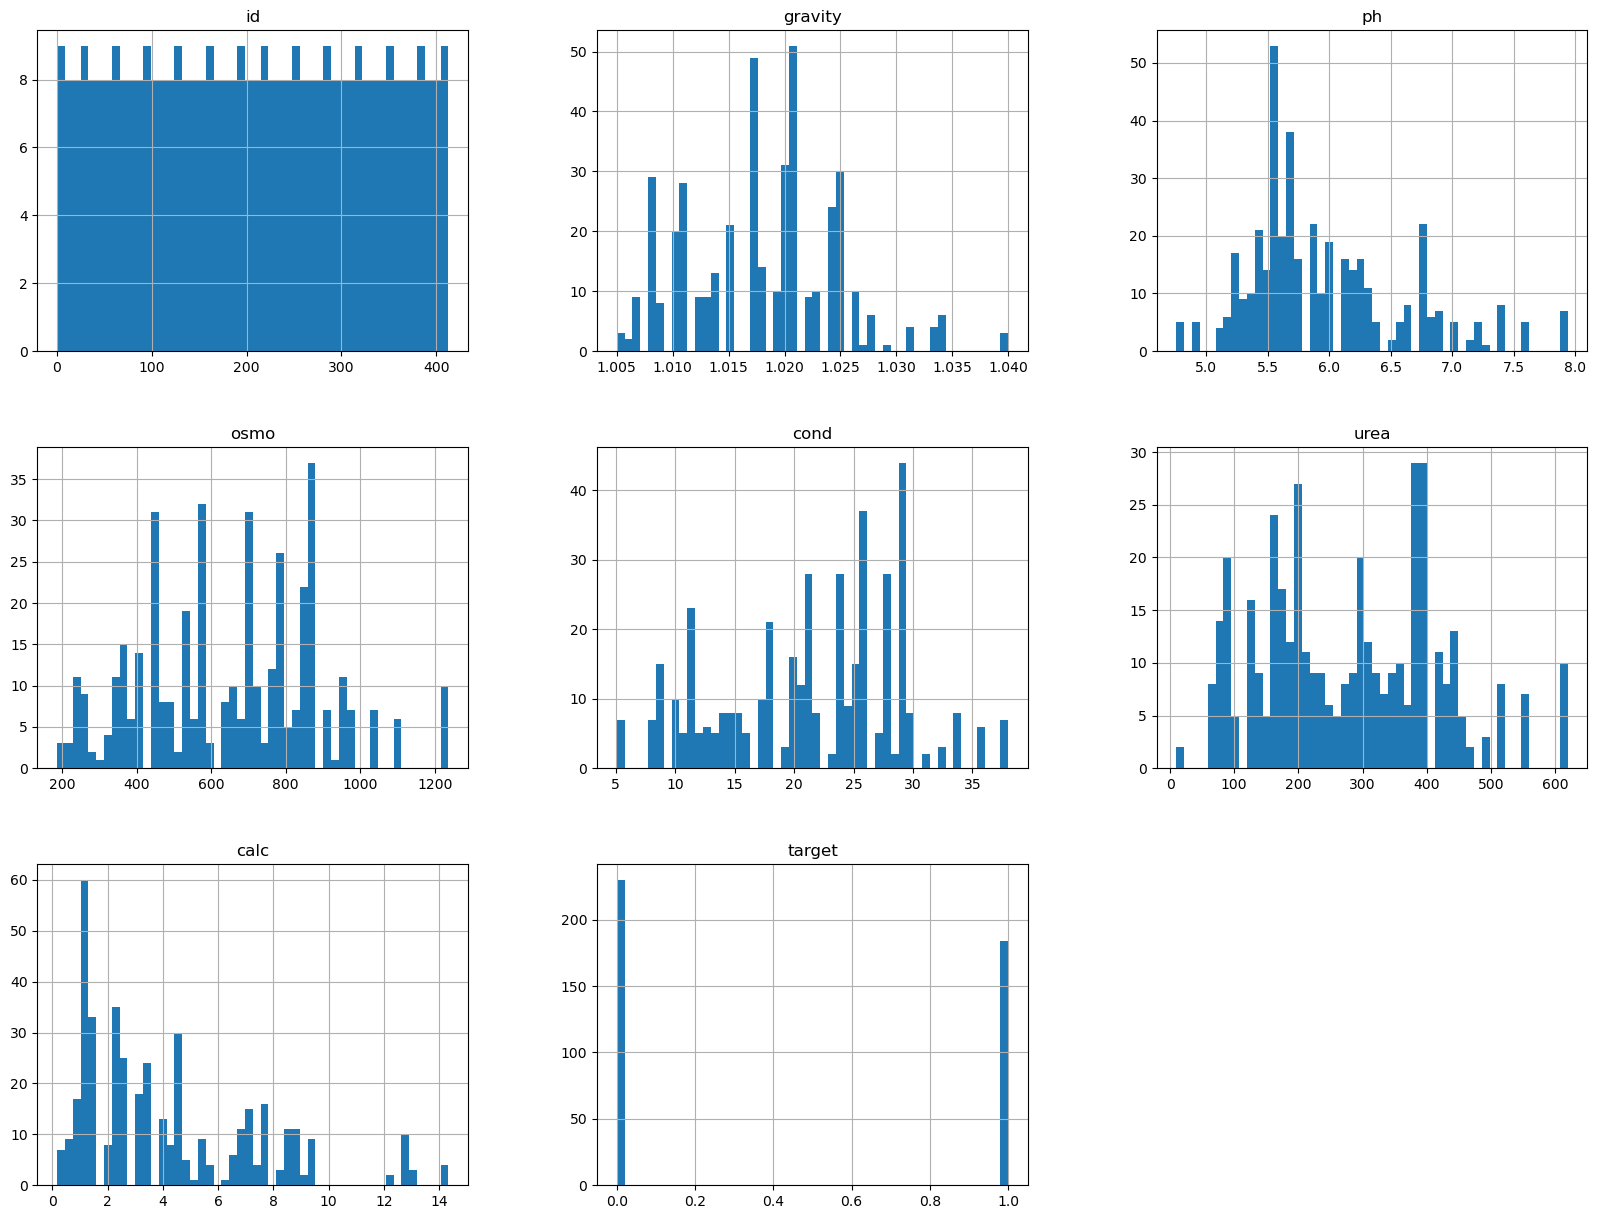

In [11]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

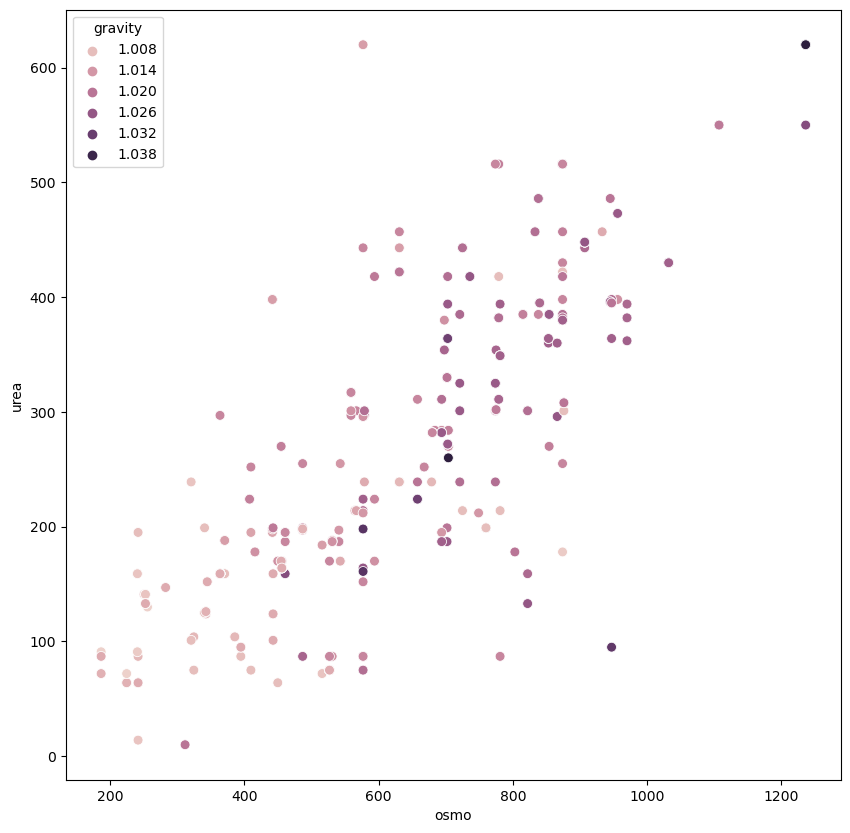

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='osmo', y='urea', hue='gravity',data=train_data,s=50)
plt.show()

In [13]:
train_data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [14]:
inputVariable.describe()

,gravity,ph,osmo,cond,urea,calc
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


from the above it shows that there is a need for scaling since the features are not normally distributed.

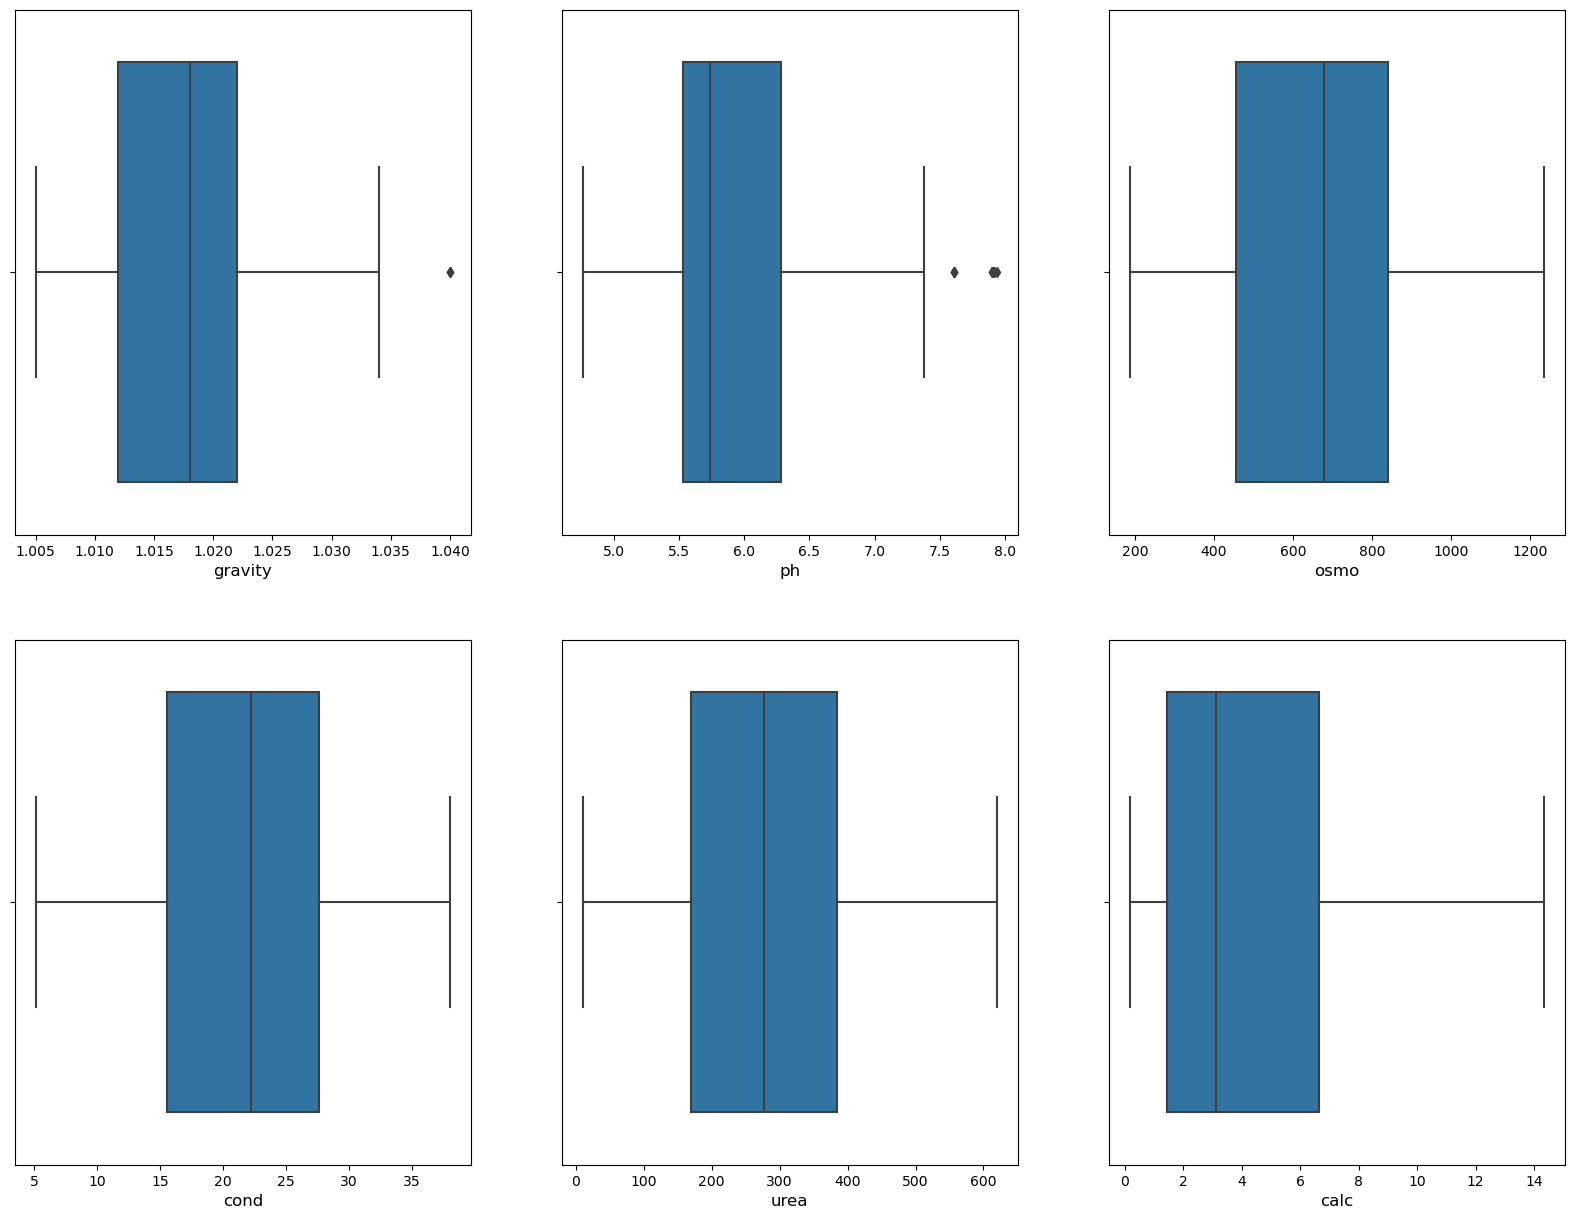

In [15]:
plt.figure(figsize=(20, 15))
for i in range(len(inputVariable.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x =inputVariable.iloc[:, i])
    plt.xlabel(inputVariable.columns[i], size =12)

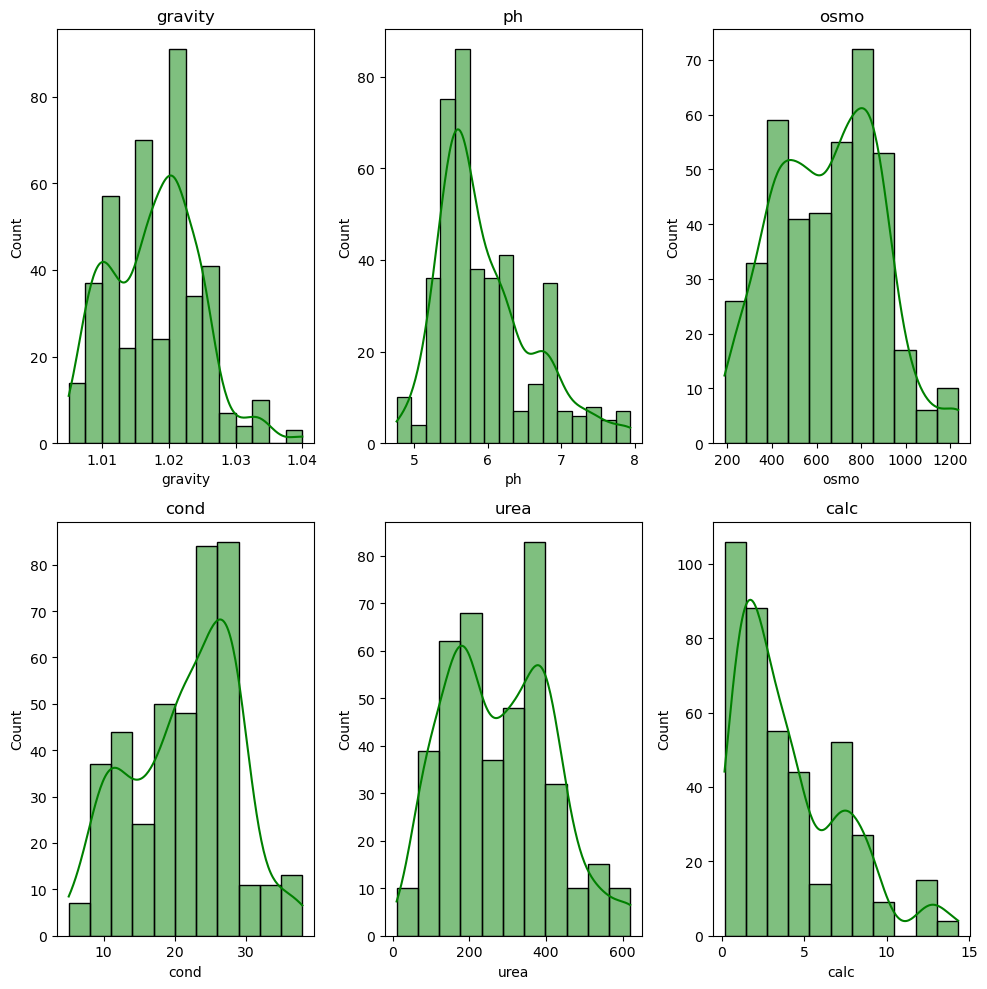

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(inputVariable.columns):
        sns.histplot(inputVariable.iloc[:,i], ax=ax, kde=True, color='green')
        ax.set(title=inputVariable.columns[i])
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

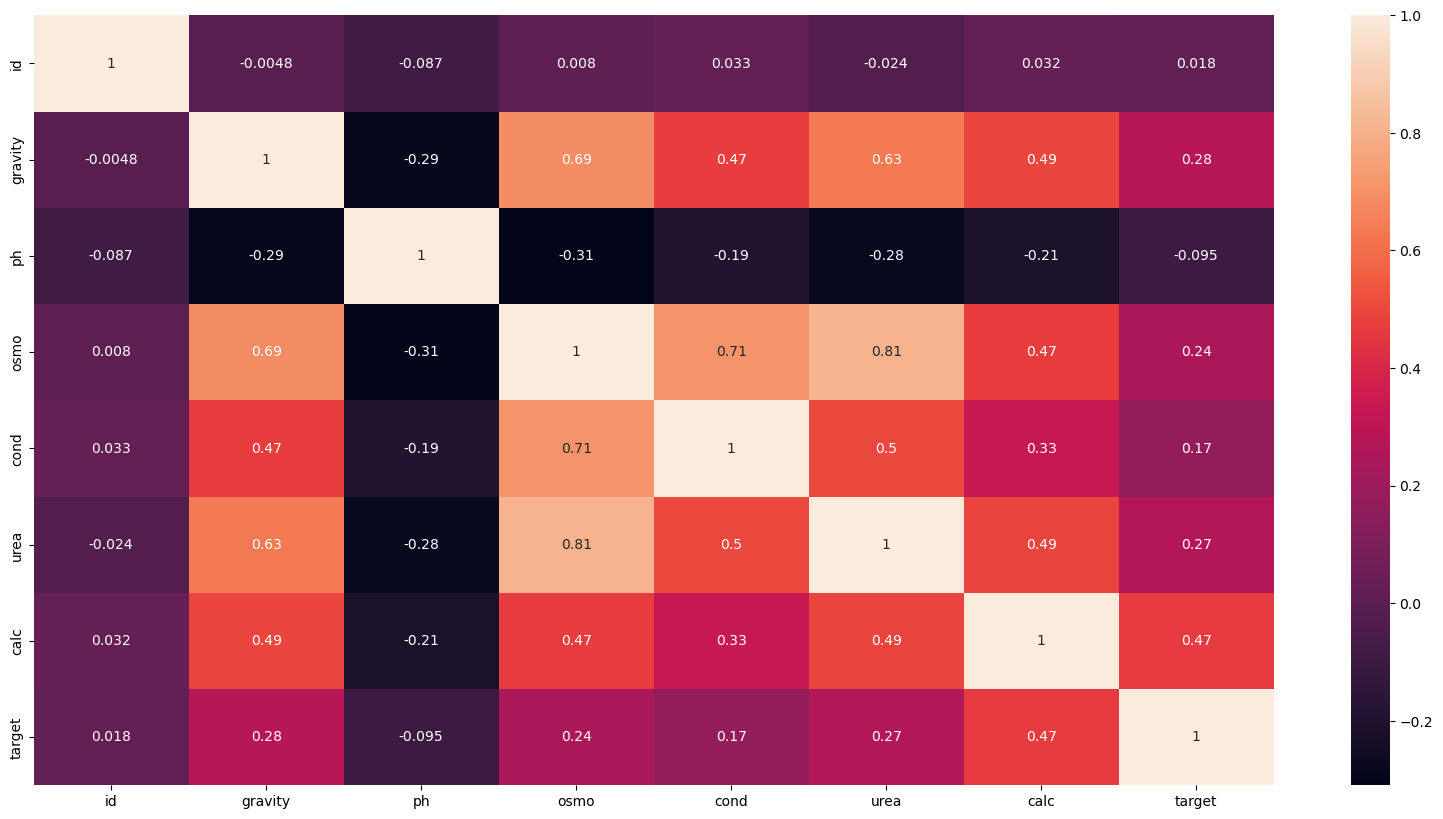

In [17]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(train_data.corr(), annot= True)

In [18]:
#train_data.columns, test_data.columns

In [19]:
#targetVariable= train_data.target
#new_train_data = train_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
#new_test_data = test_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
#new_train_data.head(), new_test_data.head()

# DataTransformation

> **FEATURE ENGINEERING**

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
class UrineAnalysis(BaseEstimator, TransformerMixin):
    def __init__(self, data=None):
        self.data = data
    
    def calculate_osmo_gravity(self):
        self.data['Osmo_gravity'] = self.data['osmo'] / self.data['gravity']
        
    def calculate_ph_calc(self):
        self.data['PH_calc'] = self.data['ph'] / self.data['calc']
        
    def calculate_ph_urea(self):
        self.data['PH_urea'] = self.data['ph'] * self.data['urea']
        
    def calculate_particle_calc(self):
        self.data['particle_calc'] = self.data['osmo'] / self.data['calc']
        
    def calculate_particle_urea(self):
        self.data['particle_urea'] = self.data['osmo'] / self.data['urea']
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        self.data = X
        self.calculate_osmo_gravity()
        self.calculate_ph_calc()
        self.calculate_ph_urea()
        self.calculate_particle_calc()
        self.calculate_particle_urea()
        return self.data

> **Scaling**

In [21]:

class RescaleData(BaseEstimator, TransformerMixin):
    def __init__(self, scaler='standard'):
        self.scaler = scaler
        if scaler == 'standard':
            self.scaler_ = StandardScaler()
        elif scaler == 'minmax':
            self.scaler_ = MinMaxScaler()
        else:
            raise ValueError('Invalid scaler type specified.')
    
    def fit(self, X, y=None):
        self.scaler_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.scaler_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.scaler_.fit_transform(X)

In [22]:

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as Rsquared, log_loss
import warnings
warnings.filterwarnings('ignore')
import time

In [23]:
from sklearn.preprocessing import Normalizer,StandardScaler

class NormalizeData(BaseEstimator, TransformerMixin):
    def __init__(self, norm='l2'):
        self.norm = norm
        self.normalizer_ = Normalizer(norm=self.norm)
    
    def fit(self, X, y=None):
        self.normalizer_.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.normalizer_.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.normalizer_.fit_transform(X)

# FeatureSelection

In [24]:
from sklearn.feature_selection import SelectKBest,chi2, RFE,mutual_info_classif

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y=None):
        from sklearn.feature_selection import SelectKBest, f_regression
        self.selector = SelectKBest(f_regression, k=self.k)
        self.selector.fit(X, y)
        return self
        
    def transform(self, X):
        return self.selector.transform(X)
    
    def get_support(self, indices=False):
        return self.selector.get_support(indices=indices)

# PIPELINE

In [25]:
from sklearn.pipeline import Pipeline
urineAnalysis = UrineAnalysis()
rescale  = RescaleData(scaler='standard')
normalize = NormalizeData(norm='l2')
featureSelect = FeatureSelection(k=10)
pipeline = Pipeline(steps=[('urineAnalysis', urineAnalysis),('rescale', rescale), ('normalize', normalize),('featureSelect', featureSelect)])
processedData = pipeline.fit_transform(inputVariable,targetVar )
processedData.shape

(414, 10)

In [26]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(processedData,targetVar,test_size=0.2,random_state=42)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
model_grad = CatBoostClassifier()

LR =[0.15,0.1,1.0,0.05]
n_estimator =[100,150,200,250]
maxDepth = [2,3,4,5]
random_seed =[2,4,6,8]
reg_lambda = [20,30,40,60]
bootstrap_type =['MSV', 'Bayesian', 'Bernoulli']
tuning_param ={'eta':LR,'iterations':n_estimator,'max_depth':maxDepth,'random_seed':random_seed,'reg_lambda':reg_lambda,'bootstrap_type':bootstrap_type}
randm_src = RandomizedSearchCV(estimator=model_grad, param_distributions = tuning_param,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(Xtrain,Ytrain)
randm_src.best_params_

0:	learn: 0.6845445	total: 58.5ms	remaining: 8.71s
1:	learn: 0.6766107	total: 58.9ms	remaining: 4.36s
2:	learn: 0.6655622	total: 59.4ms	remaining: 2.91s
3:	learn: 0.6565784	total: 59.7ms	remaining: 2.18s
4:	learn: 0.6489863	total: 60ms	remaining: 1.74s
5:	learn: 0.6407985	total: 60.4ms	remaining: 1.45s
6:	learn: 0.6347243	total: 60.7ms	remaining: 1.24s
7:	learn: 0.6310538	total: 61.5ms	remaining: 1.09s
8:	learn: 0.6256553	total: 62.1ms	remaining: 972ms
9:	learn: 0.6227777	total: 62.5ms	remaining: 875ms
10:	learn: 0.6176040	total: 62.8ms	remaining: 794ms
11:	learn: 0.6131715	total: 63.2ms	remaining: 726ms
12:	learn: 0.6087659	total: 63.6ms	remaining: 670ms
13:	learn: 0.6052781	total: 63.9ms	remaining: 620ms
14:	learn: 0.6017160	total: 64.4ms	remaining: 580ms
15:	learn: 0.5994177	total: 64.9ms	remaining: 543ms
16:	learn: 0.5973741	total: 65.2ms	remaining: 510ms
17:	learn: 0.5949405	total: 65.7ms	remaining: 482ms
18:	learn: 0.5913142	total: 66ms	remaining: 455ms
19:	learn: 0.5856365	total

{'reg_lambda': 30,
 'random_seed': 2,
 'max_depth': 2,
 'iterations': 150,
 'eta': 0.15,
 'bootstrap_type': 'Bayesian'}

In [28]:
cat_model = CatBoostClassifier(iterations=150,max_depth=2,eta=0.05,
                               random_seed=4,reg_lambda=30,bootstrap_type='Bayesian')
cat_model.fit(Xtrain,Ytrain)
Y_predictn = cat_model.predict_proba(Xtest)
logloss = log_loss(Ytest, Y_predictn)
print(logloss)

0:	learn: 0.6879548	total: 1.03ms	remaining: 154ms
1:	learn: 0.6814157	total: 2.6ms	remaining: 193ms
2:	learn: 0.6747375	total: 2.93ms	remaining: 144ms
3:	learn: 0.6694227	total: 3.21ms	remaining: 117ms
4:	learn: 0.6650607	total: 3.52ms	remaining: 102ms
5:	learn: 0.6606017	total: 3.84ms	remaining: 92.2ms
6:	learn: 0.6568185	total: 4.13ms	remaining: 84.3ms
7:	learn: 0.6519181	total: 4.41ms	remaining: 78.2ms
8:	learn: 0.6482341	total: 4.7ms	remaining: 73.7ms
9:	learn: 0.6441810	total: 4.99ms	remaining: 69.9ms
10:	learn: 0.6396905	total: 5.27ms	remaining: 66.6ms
11:	learn: 0.6355784	total: 5.52ms	remaining: 63.5ms
12:	learn: 0.6318723	total: 5.84ms	remaining: 61.6ms
13:	learn: 0.6280226	total: 6.11ms	remaining: 59.4ms
14:	learn: 0.6252608	total: 6.4ms	remaining: 57.6ms
15:	learn: 0.6218168	total: 6.66ms	remaining: 55.8ms
16:	learn: 0.6201612	total: 6.94ms	remaining: 54.3ms
17:	learn: 0.6175761	total: 7.22ms	remaining: 53ms
18:	learn: 0.6147653	total: 7.5ms	remaining: 51.7ms
19:	learn: 0.6

In [29]:
"""urine_analysis = UrineAnalysis(ttdata)

Use the class methods to calculate new variables and add them to the dataset
urine_analysis.calculate_osmo_gravity()
urine_analysis.calculate_ph_calc()
urine_analysis.calculate_ph_urea()
urine_analysis.calculate_particle_calc()
urine_analysis.calculate_particle_urea()
ttdata.drop(['osmo'],axis=1)Display the updated dataset"""
#ttdata.head()
processedTestData = pipeline.transform(ttdata)

In [30]:
testDataPredict=cat_model.predict_proba(processedTestData)
prediction = pd.DataFrame({'id': test_data['id'], 'target': testDataPredict[:, 1]})
prediction.to_csv('targetPredicted.csv', index=False)
print("Your submission was successfully saved!")
prediction.head()
                         

Your submission was successfully saved!


,id,target
0,414,0.182407
1,415,0.473046
2,416,0.753542
3,417,0.542003
4,418,0.298278
